In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [2]:
# all the constants are in CGS units
# physical constants
sigma = 5.67051e-5 # Stefan-Boltzmann constant erg cm-2 K-4 s-1
k = 1.380658e-16 # Boltzmann constant erg k-1
m_u = 1.6605402e-24 # Atomic mass unit g
G = 6.67259e-8 # Gravitational constant cm3 g-1 s-2
h = 6.6260755e-27 # Planck constant erg s
c = 2.99792458e10 # speed of light in a vacuum cm s-1

e = 4.8032068e-10 # Electron charge esu
m_e = 9.1093897e-28 # Mass of electron g
# distance
au = 1.496e13

# earth
r_earth = 6.378e8 # cm
m_earth = 5.974e27 # g

# sun
m_sun = 1.99e33
L_sun = 3.9e33 # Solar luminosity erg s-1

In [4]:
mu = 2.29
M = m_sun
alpha = np.sqrt(k / (mu*m_u*G*M))
r = au
beta = 3
T = (L_sun * beta * alpha / (8 * np.pi * sigma * r**(3/2)))**(2/7)
T

177.2851610148531

In [6]:
K = (3/np.pi)**(2/3) * (h**2 / (20*m_e)) * (1/(2*m_u))**(5/3)

In [9]:
N = 0.424
R = (K*m_sun**(-1/3))/(N*G) / r_earth
R

1.3927705799374677

In [12]:
R = (K*m_sun**(-1/3))/(N*G)
rho_c = 5.99 * m_sun / (4*np.pi*R**3 / 3)
print('{:.3e}'.format(rho_c))

4.060e+06


In [15]:
v = h / m_e * (rho_c / (2*m_u))**(1/3)
print('{:.3e}'.format(v))

7.778e+10


In [5]:
m_earth / (4 * np.pi * 3 * (r_earth)**3)

0.6107740189607488

In [3]:
0.42 * np.pi

1.319468914507713

In [12]:
z1 = 1
z2 = 7
nu = 14/15
T = 1e7
E = (8*np.pi**2*z1**2*z2**2*e**4*nu*m_u) / h**2
nu = -2/3 + (np.pi**2 * E / (4*k*T))**(1/3)
nu

22.841170199389623

In [18]:
# calculate the radiation per wavelength
def B_lambda(lambda1, lambda2, T):
    lambda1 = lambda1*1e-7
    lambda2 = lambda2*1e-7
    f = lambda x:1 / (x**5 * (np.exp(h*c / (x*k*T))-1))
    B = scipy.integrate.quad(f, lambda1, lambda2)
    return B

In [24]:
B1 = B_lambda(400, 700, 6000)[0]
B1

737973667298383.4

In [25]:
B2 = B_lambda(0, np.inf, 6000)[0]
B2

C:\Users\huqr\AppData\Local\Temp\ipykernel_17624\168741950.py:5: RuntimeWarning: overflow encountered in exp
  f = lambda x:1 / (x**5 * (np.exp(h*c / (x*k*T))-1))


1964035601986914.2

In [42]:
# t = np.arange(25, 105, 5)
# sigma = 5.67e-8
# eta_s = 1 - sigma*((t+273.15)**4 - 280**4)/(1e3)
# eta_d = 1 - sigma*((t+273.15)**4 - 280**4)/(2e3)

In [54]:
# ind = np.where(t==70)[0][0]
# eta_d[ind]

0.7811676185931558

In [56]:
# T = 70
# S = 1 - sigma*((T+273.15)**4 - 280**4)/(750)
# D = 1 - sigma*((T+273.15)**4 - 280**4)/(750*2)

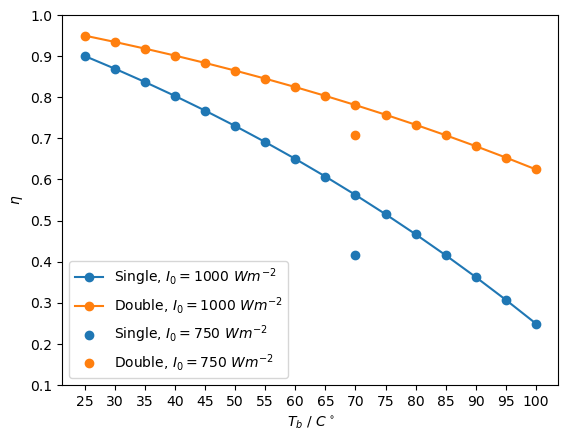

In [58]:
# plt.plot(t, eta_s, marker='o',  label=r'Single, $I_0=1000 \ W m^{-2}$')
# plt.plot(t, eta_d, marker='o', label=r'Double, $I_0=1000 \ W m^{-2}$')
# plt.scatter(T, S, label=r'Single, $I_0=750 \ W m^{-2}$')
# plt.scatter(T, D, label=r'Double, $I_0=750 \ W m^{-2}$')
# plt.legend()
# plt.ylabel(r'$\eta$')
# plt.xlabel(f'$T_b \ / \ C^\circ$')
# plt.xticks(np.arange(25, 105, 5))
# plt.yticks(np.arange(0.1, 1.1, 0.1))
# plt.show()